# ☄️ 주제: 쌍성 데이터 확인

In [1]:
import pandas as pd 


train = pd.read_csv('../../../datasets/p_cross_train.csv')
test = pd.read_csv('../../../datasets/p_cross_test.csv')

s_df = pd.concat([train, test])
s_df

,parallax,l,b,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.591158,358.120608,1.341316,0.600683,0.208506,18.308180,3.330145,0
1,0.342870,322.286221,5.765249,1.394752,0.552415,20.113094,2.369076,0
2,0.738506,8.883826,0.945923,1.297335,0.441671,19.531239,2.658411,0
3,0.813744,30.357954,-2.293423,0.000000,0.683165,19.942703,2.246302,0
4,1.138839,283.724818,4.703923,3.823559,0.764093,20.105738,1.548685,0
...,...,...,...,...,...,...,...,...
57355,0.459307,275.521472,2.757137,0.000000,0.344013,19.785795,1.394045,0
57356,0.775322,332.120746,2.175602,0.000000,0.116216,17.915752,1.751167,0
57357,1.218430,137.235845,38.119971,0.000000,0.017844,14.884115,0.892797,0
57358,0.534865,2.046559,-9.704276,0.245902,0.135302,17.919464,0.849689,0


In [2]:
s_df.columns

Index(['parallax', 'l', 'b', 'astrometric_excess_noise', 'parallax_error',
       'phot_g_mean_mag', 'bp_rp', 'is_binary'],
      dtype='object')

| 컬럼명                        | 설명                                                     |
|------------------------------|----------------------------------------------------------|
| parallax                     | 시차 (천체의 거리 측정에 사용됨, 밀리초각 단위)                 |
| l                            | 은하좌표계에서의 경도 (도 단위)                                |
| b                            | 은하좌표계에서의 위도 (도 단위)                                |
| astrometric_excess_noise     | 천문학적 과잉 잡음 (관측 데이터의 품질을 나타내는 지표)          |
| parallax_error               | 시차 측정의 오차 (밀리초각 단위)                               |
| phot_g_mean_mag              | G 밴드 평균 등급 (밝기, 대수 척도)                             |
| bp_rp                        | 청색과 적색 필터 사이의 색 지수 (색상 지표)                     |
| is_binary                    | 이진성 여부 (쌍성 여부를 나타내는 이진 변수, 1: 이진성, 0: 단독성) |


In [5]:
s_df.isna().sum()

parallax                    0
l                           0
b                           0
astrometric_excess_noise    0
parallax_error              0
phot_g_mean_mag             0
bp_rp                       0
is_binary                   0
dtype: int64

In [6]:
s_df.duplicated().sum()

0

# Cycle01
- 별도의 전처리 없이 훈련 점수 확인

In [7]:
s_df.is_binary.value_counts()

is_binary
0    342642
1      2999
Name: count, dtype: int64

In [8]:
s_df.corr()['is_binary'].sort_values(ascending=False)[1:]

parallax                    0.141219
b                           0.001576
l                           0.000691
astrometric_excess_noise   -0.022305
bp_rp                      -0.067428
parallax_error             -0.082760
phot_g_mean_mag            -0.300561
Name: is_binary, dtype: float64

<Axes: >

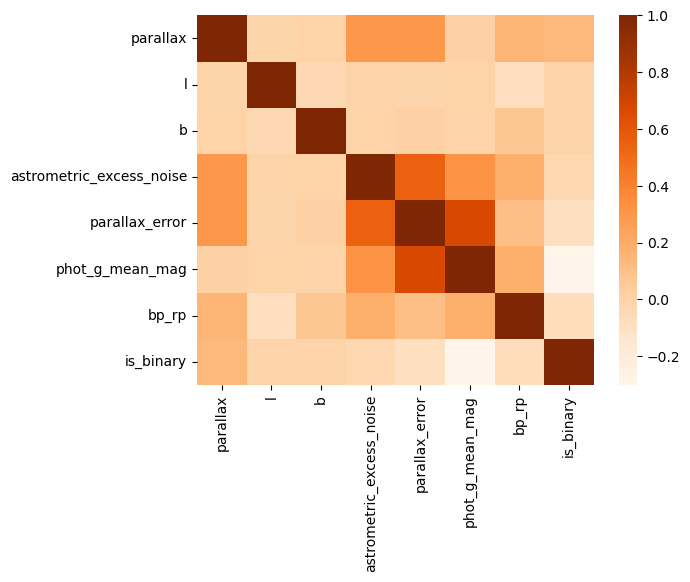

In [9]:
import seaborn as sns
corr = s_df.corr()
sns.heatmap(corr, cmap= "Oranges")

In [10]:
from statsmodels.api import OLS

features, targets = s_df.iloc[:, :-1],s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):              0.045
Method:                 Least Squares   F-statistic:                              2309.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        13:52:55   Log-Likelihood:                      3.3786e+05
No. Observations:              345641   AIC:                                 -6.757e+05
Df Residuals:                  345634   BIC:                                 -6.756e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = s_df.iloc[:, :-1],s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)
# lg.fit(over_X_train, over_y_train)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[68419   110]
 [  492   108]]
정확도: 0.9913, 정밀도: 0.4954, 재현율: 0.1800, F1:0.2641, AUC:0.5892
###########################################################################


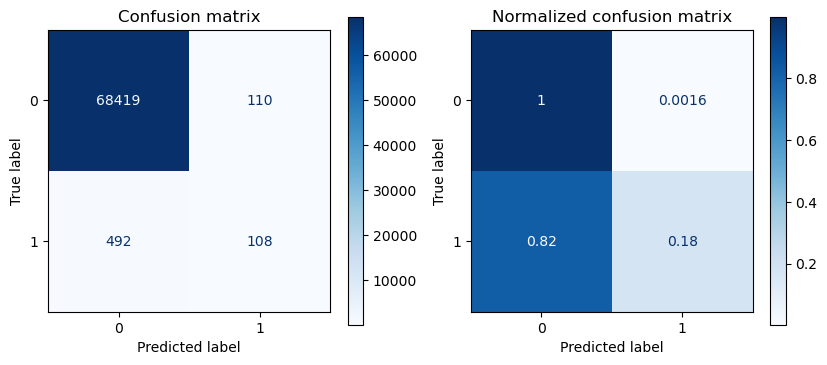

In [13]:
get_evaluation(y_test, prediction, lg, X_test)

# C01
- 전처리 과정없이 훈련을 진행했을 때는 신뢰성이 높지 않아 target의 비중 차이가 크기 때문에 언더샘플링 진행.

# Cycle02
- 언더샘플링 진행 후 로지스틱 회귀 분석 진행

In [14]:
# 언더샘플링
sl0 = s_df[s_df['is_binary']==0].sample(2999, random_state=321)
sl1 = s_df[s_df['is_binary']==1]

under_s_df = pd.concat([sl0, sl1]).reset_index(drop=True)
under_s_df['is_binary'].value_counts()

is_binary
0    2999
1    2999
Name: count, dtype: int64

In [15]:
from statsmodels.api import OLS

features, targets = under_s_df.iloc[:, :-1],under_s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                              1380.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        13:52:57   Log-Likelihood:                         -3551.5
No. Observations:                5998   AIC:                                      7117.
Df Residuals:                    5991   BIC:                                      7164.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = under_s_df.iloc[:, :-1],under_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)
# lg.fit(over_X_train, over_y_train)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[569  31]
 [ 45 555]]
정확도: 0.9367, 정밀도: 0.9471, 재현율: 0.9250, F1:0.9359, AUC:0.9367
###########################################################################


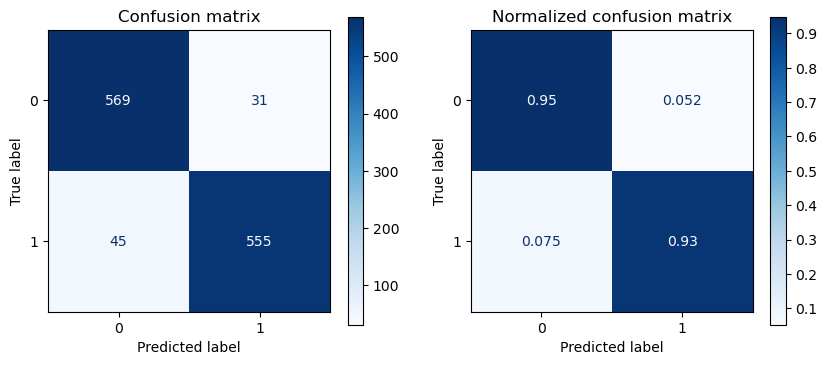

In [18]:
get_evaluation(y_test, prediction, lg, X_test)

# C02
- 언더샘플링을 진행 시 매우 높은 점수의 훈련 결과 확인

# Cycle03
- 각각의 feature의 분포에 대하여 표준화를 시키기 위해 powertransform 진행

array([[<Axes: title={'center': 'parallax'}>,
        <Axes: title={'center': 'l'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'astrometric_excess_noise'}>,
        <Axes: title={'center': 'parallax_error'}>,
        <Axes: title={'center': 'phot_g_mean_mag'}>],
       [<Axes: title={'center': 'bp_rp'}>,
        <Axes: title={'center': 'is_binary'}>, <Axes: >]], dtype=object)

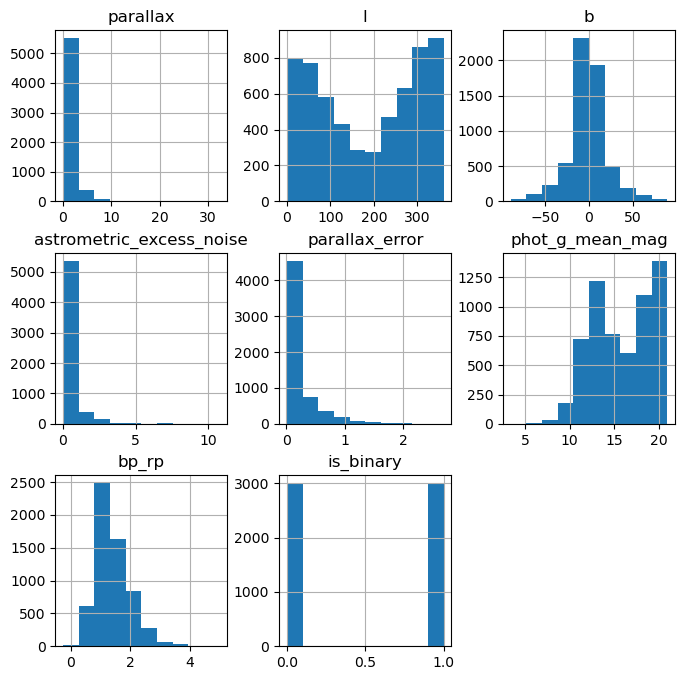

In [19]:
under_s_df.hist(figsize=(8, 8))

In [20]:
from sklearn.preprocessing import PowerTransformer

columns = under_s_df.iloc[:, :-1].columns
p_u_s_df = under_s_df.copy()

for column in columns:
    ptf = PowerTransformer(standardize=False)
    result = ptf.fit_transform(under_s_df[[column]])
    p_u_s_df[column] = result 

p_u_s_df


,parallax,l,b,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.405387,29.989781,-20.821766,0.339035,0.161142,35.026308,0.800157,0
1,0.188224,3.996458,-7.358236,0.351940,0.118940,31.172490,0.742131,0
2,0.205855,19.555950,35.146779,-0.000000,0.084320,31.958381,0.663411,0
3,0.320487,7.550987,22.834832,0.397788,0.191525,36.422794,0.828532,0
4,0.152861,59.127006,6.575563,0.373740,0.180273,36.332991,0.828336,0
...,...,...,...,...,...,...,...,...
5993,0.371185,58.902434,27.420604,0.123394,0.021577,19.575664,0.689366,1
5994,0.615969,58.219336,-45.528967,0.279710,0.048039,19.914137,0.451025,1
5995,0.111000,7.469079,-1.852046,0.105242,0.064343,28.957543,0.866681,1
5996,0.191657,52.601578,7.339623,0.129298,0.017147,18.231011,0.945831,1


In [21]:
from statsmodels.api import OLS

features, targets = p_u_s_df.iloc[:, :-1],p_u_s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              3692.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        13:52:58   Log-Likelihood:                         -1423.1
No. Observations:                5998   AIC:                                      2860.
Df Residuals:                    5991   BIC:                                      2907.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

array([[<Axes: title={'center': 'parallax'}>,
        <Axes: title={'center': 'l'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'astrometric_excess_noise'}>,
        <Axes: title={'center': 'parallax_error'}>,
        <Axes: title={'center': 'phot_g_mean_mag'}>],
       [<Axes: title={'center': 'bp_rp'}>,
        <Axes: title={'center': 'is_binary'}>, <Axes: >]], dtype=object)

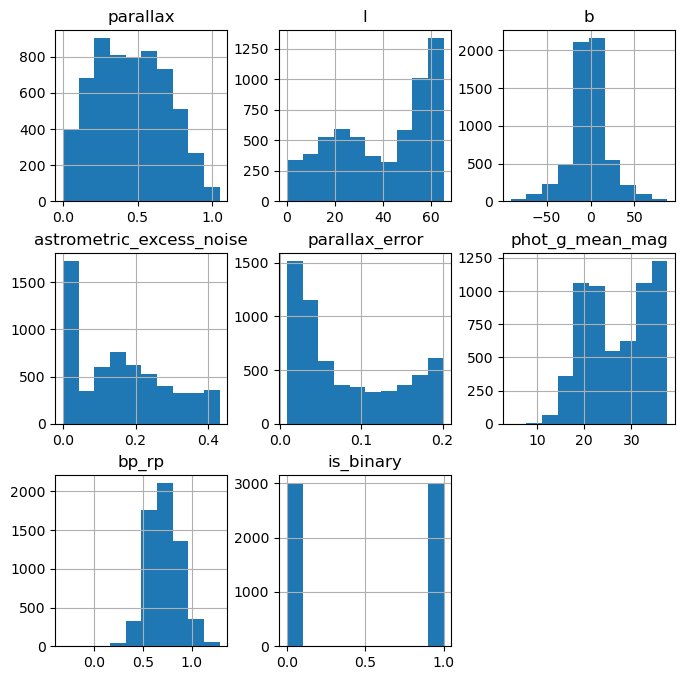

In [22]:
p_u_s_df.hist(figsize=(8, 8))


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = p_u_s_df.iloc[:, :-1],p_u_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)
# lg.fit(over_X_train, over_y_train)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

오차 행렬
[[573  27]
 [ 50 550]]
정확도: 0.9358, 정밀도: 0.9532, 재현율: 0.9167, F1:0.9346, AUC:0.9358
###########################################################################


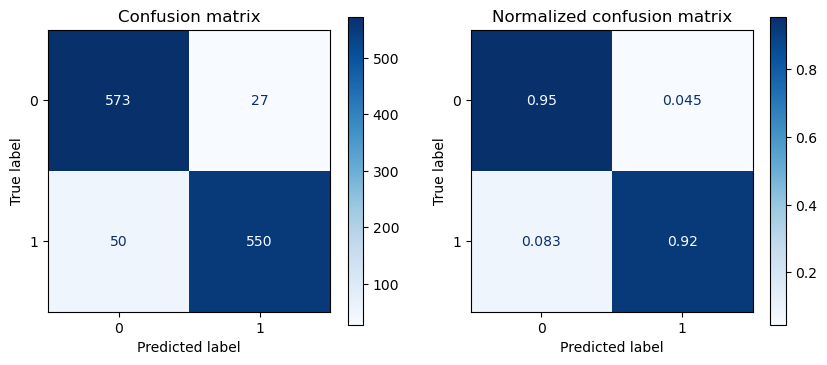

In [24]:
get_evaluation(y_test, prediction, lg, X_test)

# C03
- r2 score는 조금 낮아졌지만 정밀도 보다 정확도가 조금 더 높아진 부분을 확인할 수 있습니다.
- 높은 수치를 보여주는 데이터 셋이며 과적합을 확인하기 위해 교차 검증을 진행합니다.

# Cycle04
- 

In [25]:
from sklearn.model_selection import cross_val_score, KFold

features, targets = p_u_s_df.iloc[:,:-1], p_u_s_df.iloc[:,-1]

kf = KFold(n_splits=10, random_state=321, shuffle=True)
scores = cross_val_score(lg, features, targets , cv=kf)
scores

array([0.92833333, 0.93833333, 0.91833333, 0.93166667, 0.94333333,
       0.95166667, 0.93333333, 0.93166667, 0.92320534, 0.92988314])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
features, targets = p_u_s_df.iloc[:,:-1], p_u_s_df.iloc[:,-1]

# 데이터 분할
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

# K-폴드 교차 검증 설정
kfold = KFold(n_splits=15, random_state=321, shuffle=True)

# 로지스틱 회귀 모델 설정
lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)

# 파라미터 그리드 설정
parameters = {
    # 'C': [0.01, 0.1, 1, 10, 100],
    'C': [0.1]
    # 'penalty': ['l1', 'l2']
}

# GridSearchCV 설정
grid_lgb = GridSearchCV(lg, param_grid=parameters, cv=kfold, scoring='accuracy')  # 'r2' 대신 'accuracy' 사용
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_lgb.best_score_))


Best parameters: {'C': 0.1}
Best cross-validation score: 0.932


In [28]:
prediction = grid_lgb.predict(X_test)

오차 행렬
[[553  31]
 [ 47 569]]
정확도: 0.9350, 정밀도: 0.9483, 재현율: 0.9237, F1:0.9359, AUC:0.9353
###########################################################################


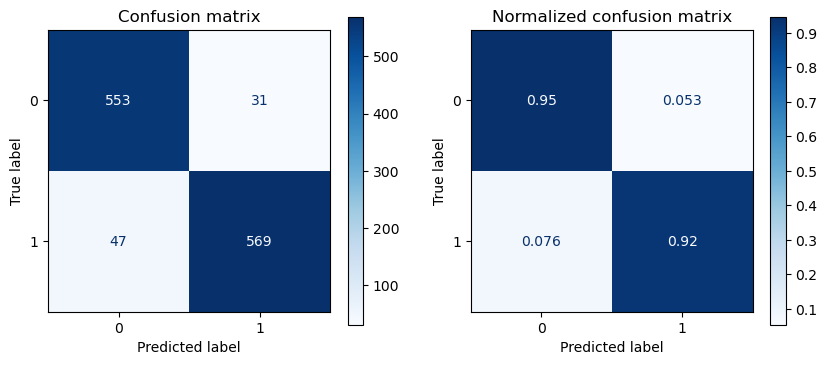

In [29]:
get_evaluation(y_test, prediction, grid_lgb, X_test)

# C04
- 에측 점수가 높지만 f1 score가 낮은 부분을 확인

# Cycle05
- 다중공선성을 가진 feature를 제거

In [30]:
pre_s_df = p_u_s_df.drop(labels=['b'], axis = 1)
pre_s_df

,parallax,l,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.405387,29.989781,0.339035,0.161142,35.026308,0.800157,0
1,0.188224,3.996458,0.351940,0.118940,31.172490,0.742131,0
2,0.205855,19.555950,-0.000000,0.084320,31.958381,0.663411,0
3,0.320487,7.550987,0.397788,0.191525,36.422794,0.828532,0
4,0.152861,59.127006,0.373740,0.180273,36.332991,0.828336,0
...,...,...,...,...,...,...,...
5993,0.371185,58.902434,0.123394,0.021577,19.575664,0.689366,1
5994,0.615969,58.219336,0.279710,0.048039,19.914137,0.451025,1
5995,0.111000,7.469079,0.105242,0.064343,28.957543,0.866681,1
5996,0.191657,52.601578,0.129298,0.017147,18.231011,0.945831,1


In [31]:
from statsmodels.api import OLS

features, targets = pre_s_df.iloc[:, :-1],pre_s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              4307.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        13:54:02   Log-Likelihood:                         -1423.6
No. Observations:                5998   AIC:                                      2859.
Df Residuals:                    5992   BIC:                                      2899.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [32]:
## from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

features, targets = pre_s_df.iloc[:,:-1], pre_s_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

# K-폴드 교차 검증 설정
kfold = KFold(n_splits=15, random_state=321, shuffle=True)

# 로지스틱 회귀 모델 설정
lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)

# 파라미터 그리드 설정
parameters = {
    'C': [1]
    # 'penalty': ['l1', 'l2']
}

# GridSearchCV 설정
grid_lgb = GridSearchCV(lg, param_grid=parameters, cv=kfold, scoring='accuracy')  # 'r2' 대신 'accuracy' 사용
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_lgb.best_score_))



Best parameters: {'C': 1}
Best cross-validation score: 0.933


In [33]:
prediction = grid_lgb.predict(X_test)

오차 행렬
[[549  35]
 [ 42 574]]
정확도: 0.9358, 정밀도: 0.9425, 재현율: 0.9318, F1:0.9371, AUC:0.9359
###########################################################################


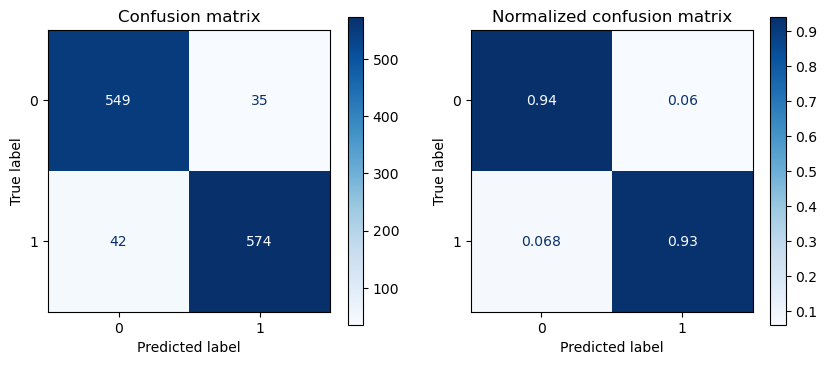

In [34]:
get_evaluation(y_test, prediction, grid_lgb, X_test)

# C05
- 최적의 하이퍼 파라미터 값을 알지 못하기 때문에 직접 손실함수 그래프 확인

# Cycle06 
- 손실값을 확인 하기 위하여 pytorch 사용 

In [35]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(321)

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((6, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=0.000004)

# 반복 횟수
epochs = 10000

for epoch in range(1, epochs + 1):
    # 가설 선언
    # H = 1 / (1 + torch.exp(-(X_train.matmul(W) + b)))
    H = torch.sigmoid(X_train.matmul(W) + b)

    # 손실 함수 선언
    # losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
    # loss = losses.mean()
    loss= binary_cross_entropy(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100 epoch 단위로 로그 출력
    if epoch % 1000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()))

1000/10000: W1: 0.0003, W2: 0.0035, W3: 0.0000, b: 0.0001, loss: 0.6679
2000/10000: W1: 0.0005, W2: 0.0077, W3: 0.0001, b: 0.0002, loss: 0.6498
3000/10000: W1: 0.0008, W2: 0.0115, W3: 0.0001, b: 0.0004, loss: 0.6362
4000/10000: W1: 0.0011, W2: 0.0147, W3: 0.0002, b: 0.0005, loss: 0.6258
5000/10000: W1: 0.0014, W2: 0.0175, W3: 0.0002, b: 0.0007, loss: 0.6178
6000/10000: W1: 0.0017, W2: 0.0200, W3: 0.0003, b: 0.0009, loss: 0.6116
7000/10000: W1: 0.0020, W2: 0.0222, W3: 0.0003, b: 0.0012, loss: 0.6068
8000/10000: W1: 0.0023, W2: 0.0241, W3: 0.0004, b: 0.0014, loss: 0.6029
9000/10000: W1: 0.0026, W2: 0.0259, W3: 0.0004, b: 0.0016, loss: 0.5998
10000/10000: W1: 0.0029, W2: 0.0274, W3: 0.0005, b: 0.0019, loss: 0.5974


In [36]:
print(H)
print(H >= 0.5)
print(W, b)

tensor([[0.5407],
        [0.3018],
        [0.6163],
        ...,
        [0.2752],
        [0.6131],
        [0.4810]], grad_fn=<SigmoidBackward0>)
tensor([[ True],
        [False],
        [ True],
        ...,
        [False],
        [ True],
        [False]])
tensor([[ 0.0029],
        [ 0.0274],
        [ 0.0005],
        [-0.0007],
        [-0.0507],
        [ 0.0003]], requires_grad=True) tensor([0.0019], requires_grad=True)


In [37]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [38]:
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

오차 행렬
[[477 127]
 [265 331]]
정확도: 0.6733, 정밀도: 0.7227, 재현율: 0.5554, F1:0.6281, AUC:0.6726
###########################################################################


In [39]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD

torch.manual_seed(321)

features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

logistic_r = nn.Sequential(
   nn.Linear(6, 1), # 결과 출력
   nn.Sigmoid() # 출력시 시그모이드 함수를 통과한다.
)
optimizer = SGD(logistic_r.parameters(), lr=4e-6)

# 반복 횟수
epochs = 100000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = logistic_r(X_train)

    # 손실 함수 선언
    loss= binary_cross_entropy(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs},', end=' ')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())} Loss: {np.round(loss.item(), 4)}')

Epoch: 10000/100000, W1: 0.2494, W2: -0.0362, W3: 0.3638, W4: -0.3118, W5: 0.0567, W6: -0.0291, b: -0.0 Loss: 0.9214
Epoch: 20000/100000, W1: 0.2519, W2: 0.0177, W3: 0.364, W4: -0.3126, W5: -0.0353, W6: -0.0298, b: -0.0 Loss: 0.5926
Epoch: 30000/100000, W1: 0.2548, W2: 0.0324, W3: 0.3645, W4: -0.3132, W5: -0.0611, W6: -0.029, b: -0.0 Loss: 0.5681
Epoch: 40000/100000, W1: 0.2578, W2: 0.0378, W3: 0.3651, W4: -0.3138, W5: -0.0708, W6: -0.0279, b: -0.0 Loss: 0.5643
Epoch: 50000/100000, W1: 0.2607, W2: 0.0401, W3: 0.3657, W4: -0.3144, W5: -0.0751, W6: -0.0266, b: -0.0 Loss: 0.5632
Epoch: 60000/100000, W1: 0.2637, W2: 0.0411, W3: 0.3663, W4: -0.3147, W5: -0.077, W6: -0.0254, b: -0.0 Loss: 0.5625
Epoch: 70000/100000, W1: 0.2667, W2: 0.0416, W3: 0.3669, W4: -0.315, W5: -0.078, W6: -0.0241, b: -0.0 Loss: 0.562
Epoch: 80000/100000, W1: 0.2697, W2: 0.0417, W3: 0.3675, W4: -0.3153, W5: -0.0785, W6: -0.0227, b: -0.0 Loss: 0.5615
Epoch: 90000/100000, W1: 0.2727, W2: 0.0418, W3: 0.3681, W4: -0.3156, 

In [40]:
get_evaluation(y_test.detach().numpy(), logistic_r(X_test) >= 0.5)

오차 행렬
[[488 116]
 [244 352]]
정확도: 0.7000, 정밀도: 0.7521, 재현율: 0.5906, F1:0.6617, AUC:0.6993
###########################################################################


In [41]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
import matplotlib.pyplot as plt

torch.manual_seed(321)

# 데이터 불러오기와 전처리
features, targets = pre_s_df.iloc[:, :-1], pre_s_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 모델 구성
logistic_r = nn.Sequential(
   nn.Linear(6, 1),
   nn.Sigmoid()
)
optimizer = SGD(logistic_r.parameters(), lr=4e-6)

# 반복 횟수
epochs = 300000
real_train_loss_history = []
val_test_loss_history = []

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = logistic_r(X_train)

    # 손실 함수 선언
    loss = binary_cross_entropy(H, y_train)
    real_train_loss_history.append(loss.item())

    # 검증 손실 계산
    with torch.no_grad():
        val_loss = binary_cross_entropy(logistic_r(X_test), y_test)
        val_test_loss_history.append(val_loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10000/300000, Loss: 0.9214
Epoch 20000/300000, Loss: 0.5926
Epoch 30000/300000, Loss: 0.5681
Epoch 40000/300000, Loss: 0.5643
Epoch 50000/300000, Loss: 0.5632
Epoch 60000/300000, Loss: 0.5625
Epoch 70000/300000, Loss: 0.5620
Epoch 80000/300000, Loss: 0.5615
Epoch 90000/300000, Loss: 0.5610
Epoch 100000/300000, Loss: 0.5605
Epoch 110000/300000, Loss: 0.5599
Epoch 120000/300000, Loss: 0.5594
Epoch 130000/300000, Loss: 0.5589
Epoch 140000/300000, Loss: 0.5584
Epoch 150000/300000, Loss: 0.5579
Epoch 160000/300000, Loss: 0.5574
Epoch 170000/300000, Loss: 0.5569
Epoch 180000/300000, Loss: 0.5564
Epoch 190000/300000, Loss: 0.5559
Epoch 200000/300000, Loss: 0.5554
Epoch 210000/300000, Loss: 0.5549
Epoch 220000/300000, Loss: 0.5544
Epoch 230000/300000, Loss: 0.5539
Epoch 240000/300000, Loss: 0.5534
Epoch 250000/300000, Loss: 0.5529
Epoch 260000/300000, Loss: 0.5524
Epoch 270000/300000, Loss: 0.5519
Epoch 280000/300000, Loss: 0.5514
Epoch 290000/300000, Loss: 0.5509
Epoch 300000/300000, Lo

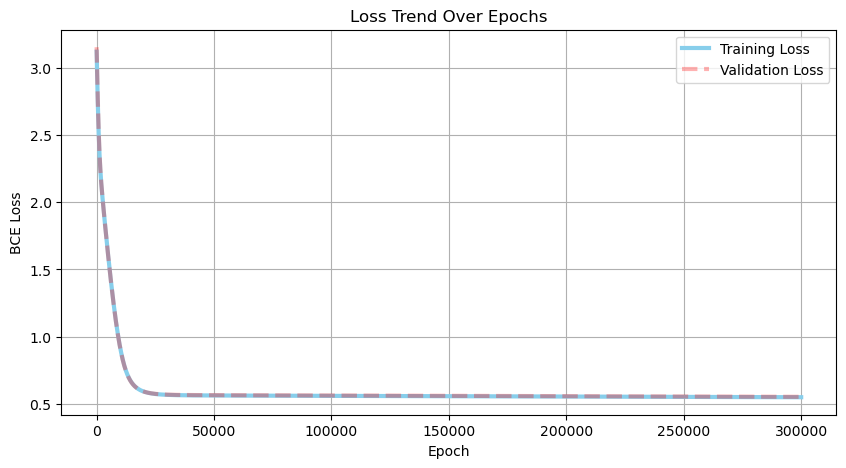

In [42]:
# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(real_train_loss_history, label='Training Loss', linewidth=3, color='skyblue')
plt.plot(val_test_loss_history, label='Validation Loss', linestyle='--', linewidth=3, alpha=0.3, color='red')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.title('Loss Trend Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
get_evaluation(y_test.detach().numpy(), logistic_r(X_test) >= 0.5)

오차 행렬
[[499 105]
 [243 353]]
정확도: 0.7100, 정밀도: 0.7707, 재현율: 0.5923, F1:0.6698, AUC:0.7092
###########################################################################


- proba 확룰을 조정하여 수치값을 조절할 수 있는지 roc-auc curve 곡선을 확인

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.scatterplot(x='parallax', y='phot_g_mean_mag', hue='is_binary', data=pre_s_df, alpha = 0.5)
# plt.show()

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
import numpy as np

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
# precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


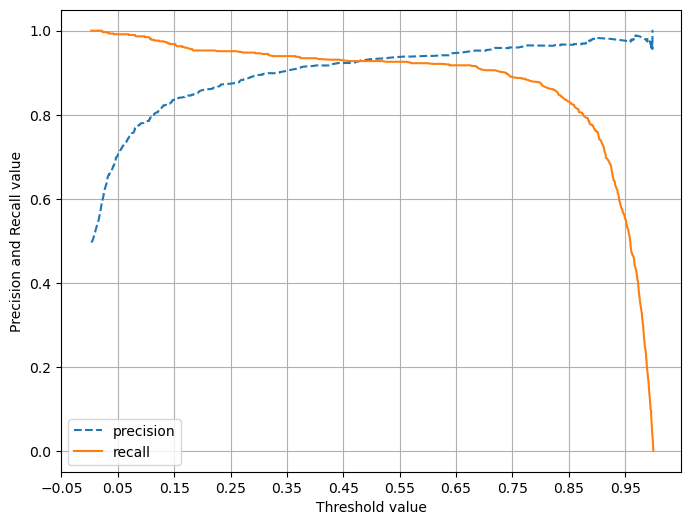

In [46]:
import numpy as np
precision_recall_curve_plot(y_test, grid_lgb.predict_proba(X_test)[:, 1] )

In [47]:
_, _, thresholds = precision_recall_curve(y_test, grid_lgb.predict_proba(X_test)[:, 1])
thresholds

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.00296564, 0.00314657, 0.00340958, ..., 0.99988071, 0.99990751,
       0.99992951])

In [48]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [49]:
get_evaluation_by_thresholds(y_test, grid_lgb.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.0029656418667867884
오차 행렬
[[  1 603]
 [  0 596]]
정확도: 0.4975, 정밀도: 0.4971, 재현율: 1.0000, F1:0.6641, AUC:0.5008
###########################################################################
임곗값: 0.0031465741787783793
오차 행렬
[[  2 602]
 [  0 596]]
정확도: 0.4983, 정밀도: 0.4975, 재현율: 1.0000, F1:0.6644, AUC:0.5017
###########################################################################
임곗값: 0.003409575875310112
오차 행렬
[[  3 601]
 [  0 596]]
정확도: 0.4992, 정밀도: 0.4979, 재현율: 1.0000, F1:0.6648, AUC:0.5025
###########################################################################
임곗값: 0.0036088557794301313
오차 행렬
[[  4 600]
 [  0 596]]
정확도: 0.5000, 정밀도: 0.4983, 재현율: 1.0000, F1:0.6652, AUC:0.5033
###########################################################################
임곗값: 0.004128857993684271
오차 행렬
[[  5 599]
 [  0 596]]
정확도: 0.5008, 정밀도: 0.4987, 재현율: 1.0000, F1:0.6655, AUC:0.5041
###########################################################################
임곗값: 0.004258955451266473
오차 행렬
[[  6

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


오차 행렬
[[ 25 579]
 [  0 596]]
정확도: 0.5175, 정밀도: 0.5072, 재현율: 1.0000, F1:0.6731, AUC:0.5207
###########################################################################
임곗값: 0.006753459892240187
오차 행렬
[[ 26 578]
 [  0 596]]
정확도: 0.5183, 정밀도: 0.5077, 재현율: 1.0000, F1:0.6734, AUC:0.5215
###########################################################################
임곗값: 0.006821242073355266
오차 행렬
[[ 27 577]
 [  0 596]]
정확도: 0.5192, 정밀도: 0.5081, 재현율: 1.0000, F1:0.6738, AUC:0.5224
###########################################################################
임곗값: 0.006985486112819935
오차 행렬
[[ 28 576]
 [  0 596]]
정확도: 0.5200, 정밀도: 0.5085, 재현율: 1.0000, F1:0.6742, AUC:0.5232
###########################################################################
임곗값: 0.007080891301113657
오차 행렬
[[ 29 575]
 [  0 596]]
정확도: 0.5208, 정밀도: 0.5090, 재현율: 1.0000, F1:0.6746, AUC:0.5240
###########################################################################
임곗값: 0.007138281478917081
오차 행렬
[[ 30 574]
 [  0 596]]
정확도: 0.5217

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[568  36]
 [ 44 552]]
정확도: 0.9333, 정밀도: 0.9388, 재현율: 0.9262, F1: 0.9324, ROC-AUC: 0.9333
################################################################################


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


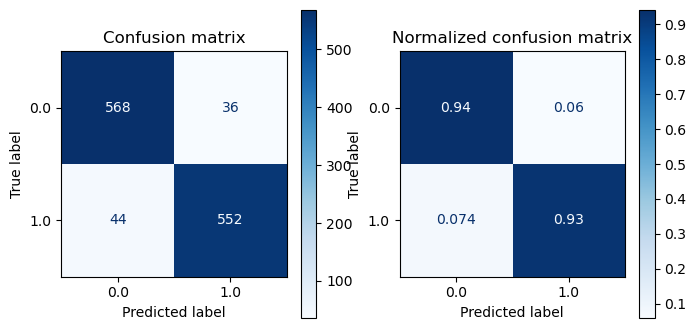

In [55]:
# binarizer = Binarizer(threshold=0.8558796444911337)
binarizer = Binarizer(threshold=0.543492311091449)

custom_prediction = binarizer.fit_transform(grid_lgb.predict_proba(X_test)[:, 1].reshape(-1, 1))
get_evaluation_by_custom_proba(y_test, custom_prediction, True)

In [56]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , custom_proba):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, custom_proba)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


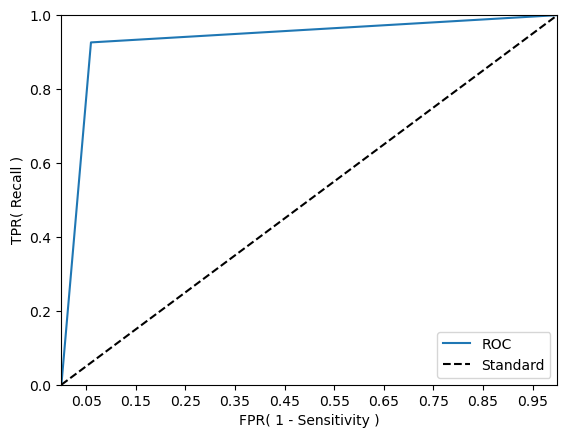

In [57]:
roc_curve_plot(y_test, custom_prediction)
# roc_curve 의 곡선의 형태도 변한 것을 확인 할 수 있습니다.

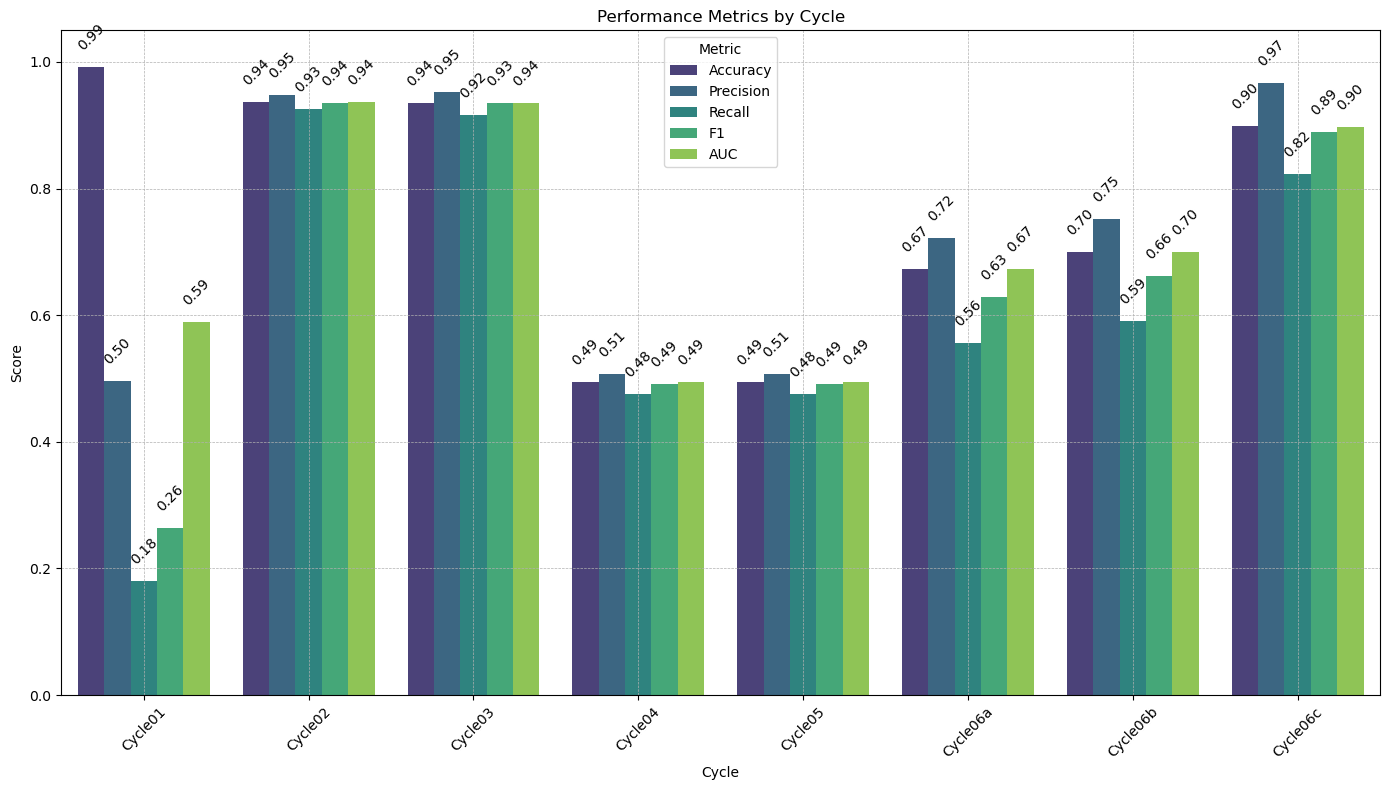

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = {
    'Cycle': ['Cycle01', 'Cycle02', 'Cycle03', 'Cycle04', 'Cycle05', 'Cycle06a', 'Cycle06b', 'Cycle06c'],
    'Accuracy': [0.9913, 0.9367, 0.9358, 0.4942, 0.4942, 0.6733, 0.7000, 0.8983],
    'Precision': [0.4954, 0.9471, 0.9532, 0.5078, 0.5078, 0.7227, 0.7521, 0.9665],
    'Recall': [0.1800, 0.9250, 0.9167, 0.4756, 0.4756, 0.5554, 0.5906, 0.8238],
    'F1': [0.2641, 0.9359, 0.9346, 0.4912, 0.4912, 0.6281, 0.6617, 0.8895],
    'AUC': [0.5892, 0.9367, 0.9358, 0.4947, 0.4947, 0.6726, 0.6993, 0.8978]
}
df = pd.DataFrame(data)

# 데이터를 'Cycle'로 그룹화하여 플롯
df_melted = df.melt(id_vars=['Cycle'], var_name='Metric', value_name='Value')

# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Cycle', y='Value', hue='Metric', data=df_melted, palette='viridis')

# 각 막대에 수치 추가
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'bottom', 
                      size=10,
                      xytext = (0, 10), 
                      textcoords = 'offset points',
                      rotation=45)

plt.title('Performance Metrics by Cycle')
plt.ylabel('Score')
plt.xlabel('Cycle')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)  # 점수 범위를 [0, 1]로 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# C06
- 매우 이상적인 재현율과 정밀도 그래프를 그리고 있기 때문에 해당 데이터에 대해서는 정밀도가 더 높아야 하기 임계치를 높여주는 과정을 거쳐서 분석 모델을
만들었습니다.
- 또한 pytorch를 사용하여 손실함수를 확인하고 각각의 그래프를 확인 후 정밀도를 높일 수 있는 확률을 가진 임계치로 모델을 훈련시켰습니다.

# 가설?
- 여러 요소에 의해 별을 확인했을 때 쌍성 식별 요소를 분석할 수 있을까요?

주제: 쌍성 식별
가설 문장: "여러 요소를 고려하여 쌍성 식별을 통해 별의 쌍성 여부를 정확하게 분석할 수 있는지 검토할 수 있을까?"
분석 목표: 천문 데이터를 사용하여 쌍성인 별을 식별하는 주요 요소를 분석하고, 이를 통해 쌍성을 정확하게 판별할 수 있는지 알아보기.

# 결론
- 해당 데이터 셋에 대하여 언더샘플링을 진행하여 쌍성인 별에 대하여 매우 높은 분석이 가능합니다.
- 재현율보다는 정밀도가 높은 모델이 필요하기 때문에 임계치를 조절하여 정밀도를 높였으며 정확하게 판단되는 모델에 훈련이 필요하기 때문에
언더샘플링을 진행한 데이터로 확인되었습니다.

결론 정리
분석 결과: 데이터셋에서 쌍성인 별을 식별하는 데 매우 높은 정확도를 달성했습니다.
데이터 처리 방법: 쌍성 식별에 있어 재현율보다 정밀도가 중요하다고 판단하여, 정밀도를 최대화하기 위한 임계치 조정과 언더샘플링 기법을 사용했습니다.
성능 개선 조치: 언더샘플링을 통해 소수 클래스인 쌍성 별의 데이터를 균형있게 조정하여, 모델이 더 정확하게 판단할 수 있도록 훈련 데이터셋을 최적화했습니다.
훈련 방법: 정밀도가 높은 모델을 구현하기 위해 적절한 데이터 전처리 후 모델 훈련을 진행하였고, 이를 통해 쌍성의 정확한 식별이 가능하게 되었습니다.
정리된 내용
가설: 별의 쌍성을 식별하는 데 영향을 미치는 다양한 요소를 분석함으로써, 천문학적 데이터를 통해 쌍성 별을 정확하게 식별할 수 있는 모델을 개발할 수 있을지 검토합니다.

결론: 분석 결과, 특정 데이터셋에 적용된 언더샘플링과 임계치 조정을 통해, 쌍성 별을 정밀하게 식별할 수 있는 모델을 성공적으로 개발하였습니다. 이 모델은 정밀도를 우선시하며, 실제 쌍성 별을 효과적으로 감지하는 능력을 보였습니다.

이러한 접근 방식은 과학적 연구나 관측에서 쌍성 별의 정확한 식별이 중요한 경우, 특히 유용할 수 있습니다. 이는 별의 질량, 궤도, 발광 등의 특성을 이해하는 데 필수적인 정보를 제공하기 때문입니다.






 